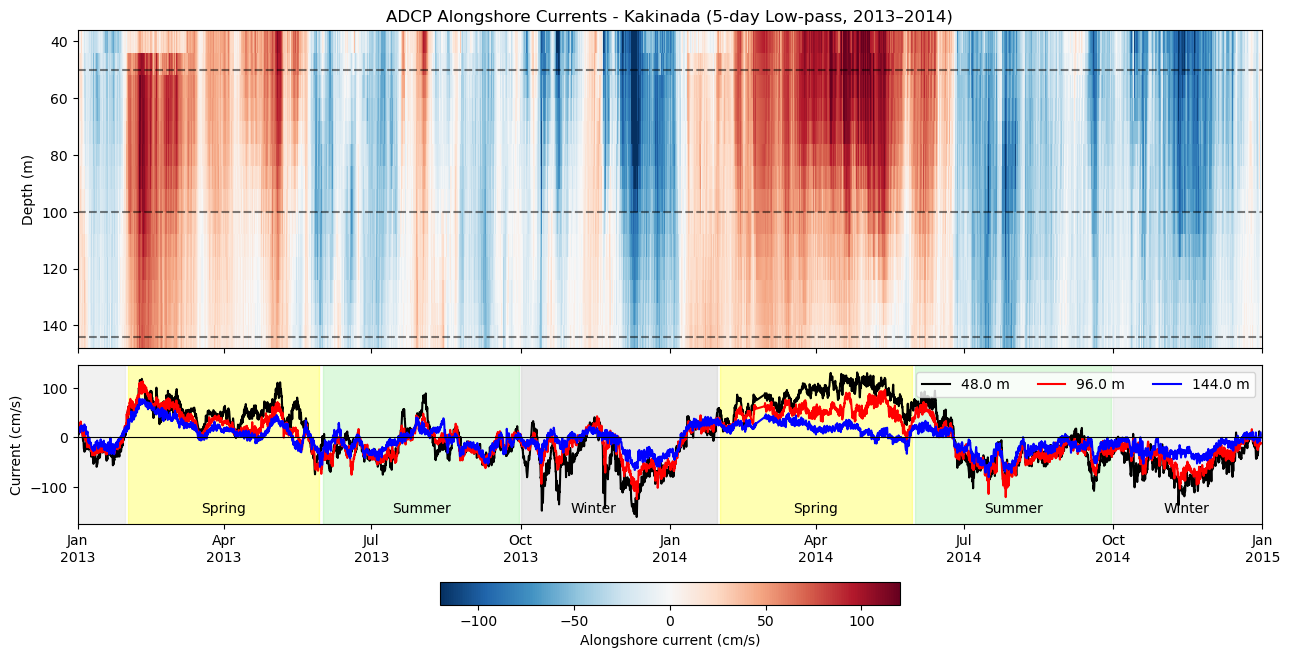

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# === File path (example: Kollam) ===
file = "East_Coast/bokd_ashr_cshr_2009_2016.nc"

# Loading the dataset from a file
ds = xr.open_dataset(file, decode_times=True)

# Extracting time, depth, and alongshore current data from the dataset
time = ds["T_MY4"].to_index()  # Converting time variable to a pandas DatetimeIndex
depth = ds["DEPTH4"].values  # Getting depth values as a NumPy array
u_along = ds["ASBOKD"].squeeze()  # Extracting alongshore current data and removing single-dimensional entries

# Replacing missing values with NaN without interpolating
u_along = u_along.where(np.isfinite(u_along))

# Applying a 5-day low-pass filter to smooth the alongshore current data
u_along_lp = u_along.rolling(T_MY4=5, center=True).mean()

# Selecting data only for the years 2013 and 2014
sel = (time >= "2013-01-01") & (time <= "2014-12-31")
time_sel = time[sel]
u_along_lp = u_along_lp.sel(T_MY4=slice("2013-01-01", "2014-12-31"))

# Limiting depth data to 150 meters or less
depth_mask = depth <= 150
depth = depth[depth_mask]
u_along_lp = u_along_lp[:, depth_mask]

# Ensuring the time dimension of u_along_lp matches time_sel by trimming
u_along_lp = u_along_lp.sel(T_MY4=time_sel)  # Explicitly align time dimension

# Transposing the low-pass filtered data for plotting with pcolormesh
u_along_lp_plot = u_along_lp.T  # Shape should be (depth, time)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(13, 7), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Creating a meshgrid for time and depth to use in the contour plot
time_mesh, depth_mesh = np.meshgrid(time_sel, depth)

# Creating a time-depth contour plot for the top panel
pcm = ax1.pcolormesh(
    time_mesh, depth_mesh, u_along_lp_plot,
    cmap="RdBu_r", vmin=-120, vmax=120
)
ax1.invert_yaxis()  # Inverting y-axis to show deeper depths at the bottom
ax1.set_ylabel("Depth (m)")
ax1.set_title("ADCP Alongshore Currents - Kakinada (5-day Low-pass, 2013–2014)")

# Adding dashed lines to indicate specific depth levels in the top panel
for d in [50, 100, 144]:
    ax1.axhline(d, color='k', linestyle='--', alpha=0.5)

# Plotting time series for selected depths in the bottom panel
depth_levels = [50, 100, 150]
colors = ["k", "r", "b"]

for d, c in zip(depth_levels, colors):
    idx = np.argmin(np.abs(depth - d))  # Finding the index of the closest depth
    ax2.plot(time_sel, u_along_lp[:, idx], color=c, label=f"{depth[idx]:.1f} m")

ax2.axhline(0, color="k", linewidth=0.8)  # Adding a horizontal line at 0 cm/s
ax2.set_ylabel("Current (cm/s)")
ax2.legend(loc="upper right", ncol=3)  # Adding a legend for depth levels

# Setting x-axis ticks and labels for both panels
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.set_xlim(time_sel[0], pd.Timestamp("2015-01-01"))  # Limiting x-axis to Jan 2015

# Shading summer and winter periods in the bottom panel
for year in [2013, 2014]:
    # Shading the summer period (June 1 to Sep 30) in light green
    ax2.axvspan(f"{year}-06-01", f"{year}-09-30", color="lightgreen", alpha=0.3)
    # Shading the Spring period (Feb 1 to Apr 30) in light green
    ax2.axvspan(f"{year}-02-01", f"{year}-05-30", color="yellow", alpha=0.3)
    # Shading the winter period (Nov 1 to Mar 31) in light grey
    ax2.axvspan(f"{year}-10-01", f"{year+1}-01-30", color="lightgrey", alpha=0.3)
    ax2.axvspan(f"{year-1}-10-01", f"{year}-01-30", color="lightgrey", alpha=0.3)
    # Adding "Summer" label at -30 cm/s in the center of the summer period
    mid_summer = pd.Timestamp(f"{year}-08-01")  # Midpoint of May to Sep
    ax2.text(mid_summer, -145, "Summer", ha="center", va="center", color="black")
    # Adding "Winter" label at -30 cm/s in the center of the winter period
    mid_winter = pd.Timestamp(f"{year}-11-15")  # Midpoint of Nov to Mar
    ax2.text(mid_winter, -145, "Winter", ha="center", va="center", color="black")
    # Adding "Winter" label at -30 cm/s in the center of the winter period
    mid_spring = pd.Timestamp(f"{year}-04-01")  # Midpoint of Mar to May
    ax2.text(mid_spring, -145, "Spring", ha="center", va="center", color="black")
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Adding a horizontal colorbar below both panels
cbar = fig.colorbar(
    pcm, ax=[ax1, ax2], orientation="horizontal",
    fraction=0.04, pad=0.1
)
cbar.set_label("Alongshore current (cm/s)")
# Save figure as PNG
#plt.savefig("ADCP_# Save figure as PNG
#plt.savefig("image.png", dpi=300, bbox_inches='tight')# Save figure as PNG
#plt.savefig("image.png", dpi=300, bbox_inches='tight')EICC.png", dpi=300, bbox_inches='tight')
plt.show()


> hi 
>

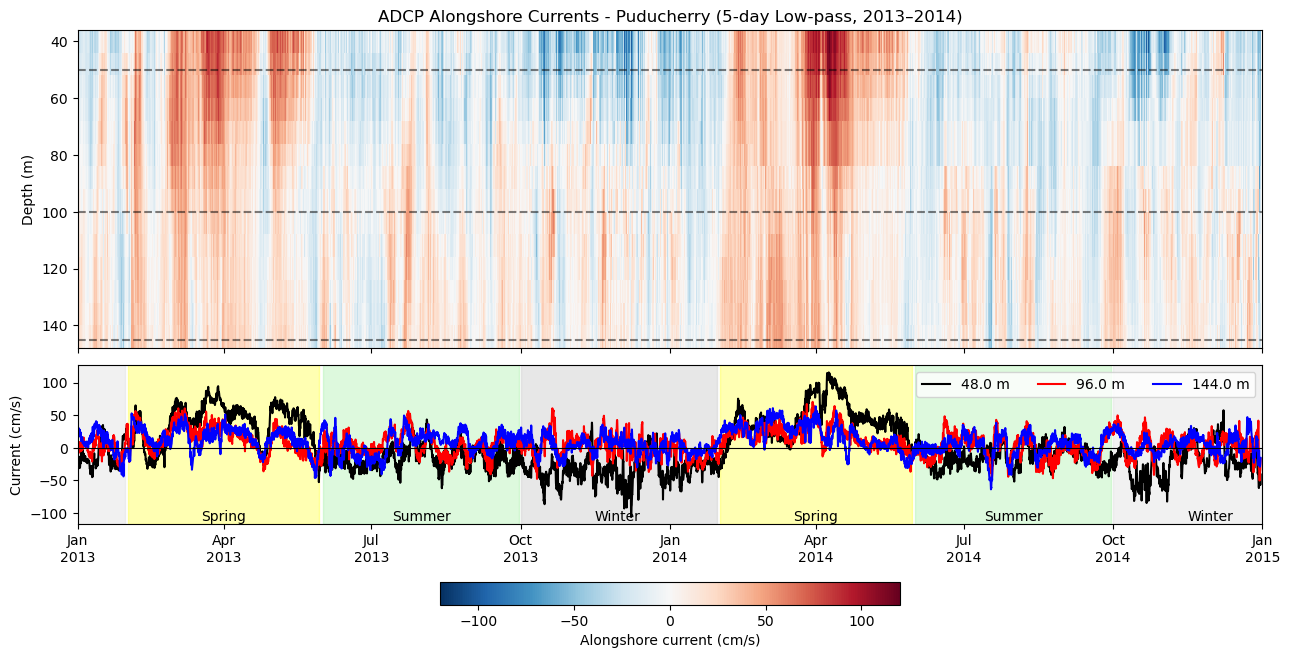

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# === File path (example: Kollam) ===
file = "East_Coast/bopd_ashr_cshr_2010_2016.nc"

# Loading the dataset from a file
ds = xr.open_dataset(file, decode_times=True)

# Extracting time, depth, and alongshore current data from the dataset
time = ds["T_MY5"].to_index()  # Converting time variable to a pandas DatetimeIndex
depth = ds["DEPTH5"].values  # Getting depth values as a NumPy array
u_along = ds["ASBOPD"].squeeze()  # Extracting alongshore current data and removing single-dimensional entries

# Replacing missing values with NaN without interpolating
u_along = u_along.where(np.isfinite(u_along))

# Applying a 5-day low-pass filter to smooth the alongshore current data
u_along_lp = u_along.rolling(T_MY5=5, center=True).mean()

# Selecting data only for the years 2013 and 2014
sel = (time >= "2013-01-01") & (time <= "2014-12-31")
time_sel = time[sel]
u_along_lp = u_along_lp.sel(T_MY5=slice("2013-01-01", "2014-12-31"))

# Limiting depth data to 150 meters or less
depth_mask = depth <= 145
depth = depth[depth_mask]
u_along_lp = u_along_lp[:, depth_mask]

# Ensuring the time dimension of u_along_lp matches time_sel by trimming
u_along_lp = u_along_lp.sel(T_MY5=time_sel)  # Explicitly align time dimension

# Transposing the low-pass filtered data for plotting with pcolormesh
u_along_lp_plot = u_along_lp.T  # Shape should be (depth, time)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(13, 7), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Creating a meshgrid for time and depth to use in the contour plot
time_mesh, depth_mesh = np.meshgrid(time_sel, depth)

# Creating a time-depth contour plot for the top panel
pcm = ax1.pcolormesh(
    time_mesh, depth_mesh, u_along_lp_plot,
    cmap="RdBu_r", vmin=-120, vmax=120
)
ax1.invert_yaxis()  # Inverting y-axis to show deeper depths at the bottom
ax1.set_ylabel("Depth (m)")
ax1.set_title("ADCP Alongshore Currents - Puducherry (5-day Low-pass, 2013–2014)")

# Adding dashed lines to indicate specific depth levels in the top panel
for d in [50, 100, 145]:
    ax1.axhline(d, color='k', linestyle='--', alpha=0.5)

# Plotting time series for selected depths in the bottom panel
depth_levels = [50, 100, 150]
colors = ["k", "r", "b"]

for d, c in zip(depth_levels, colors):
    idx = np.argmin(np.abs(depth - d))  # Finding the index of the closest depth
    ax2.plot(time_sel, u_along_lp[:, idx], color=c, label=f"{depth[idx]:.1f} m")

ax2.axhline(0, color="k", linewidth=0.8)  # Adding a horizontal line at 0 cm/s
ax2.set_ylabel("Current (cm/s)")
ax2.legend(loc="upper right", ncol=3)  # Adding a legend for depth levels

# Setting x-axis ticks and labels for both panels
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.set_xlim(time_sel[0], pd.Timestamp("2015-01-01"))  # Limiting x-axis to Jan 2015

# Shading summer and winter periods in the bottom panel
for year in [2013, 2014]:
    # Shading the summer period (June 1 to Sep 30) in light green
    ax2.axvspan(f"{year}-06-01", f"{year}-09-30", color="lightgreen", alpha=0.3)
    # Shading the Spring period (Feb 1 to Apr 30) in light green
    ax2.axvspan(f"{year}-02-01", f"{year}-05-30", color="yellow", alpha=0.3)
    # Shading the winter period (Nov 1 to Mar 31) in light grey
    ax2.axvspan(f"{year}-10-01", f"{year+1}-01-30", color="lightgrey", alpha=0.3)
    ax2.axvspan(f"{year-1}-10-01", f"{year}-01-30", color="lightgrey", alpha=0.3)
    # Adding "Summer" label 
    mid_summer = pd.Timestamp(f"{year}-08-01")  # Midpoint of May to Sep
    ax2.text(mid_summer, -105, "Summer", ha="center", va="center", color="black")
    # Adding "Winter" label 
    mid_winter = pd.Timestamp(f"{year}-11-30")  # Midpoint of Nov to Mar
    ax2.text(mid_winter, -105, "Winter", ha="center", va="center", color="black")
    # Adding "Winter" label 
    mid_spring = pd.Timestamp(f"{year}-04-01")  # Midpoint of Mar to May
    ax2.text(mid_spring, -105, "Spring", ha="center", va="center", color="black")
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Adding a horizontal colorbar below both panels
cbar = fig.colorbar(
    pcm, ax=[ax1, ax2], orientation="horizontal",
    fraction=0.04, pad=0.1
)
cbar.set_label("Alongshore current (cm/s)")
# Save figure as PNG
#plt.savefig("ADCP_# Save figure as PNG
#plt.savefig("image.png", dpi=300, bbox_inches='tight')# Save figure as PNG
#plt.savefig("image.png", dpi=300, bbox_inches='tight')EICC.png", dpi=300, bbox_inches='tight')
plt.show()
